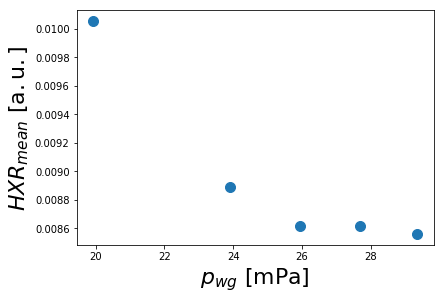

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request as urllib 
import scipy.signal as scisig
import matplotlib.colors as colors 
import scipy  as sp
import matplotlib.patches as mpatches
import math
from scipy import interpolate

def get_preassure_gas(shot):
    url_press = 'http://golem.fjfi.cvut.cz/utils/data/'+ str(shot) +'/pressure'
    file_press = urllib.urlopen(url_press).read()
    press = float(file_press)
    return press

def get_mag_field(shot):
    url_press = 'http://golem.fjfi.cvut.cz/utils/data/'+ str(shot) +'/toroidal_field_mean'
    file_press = urllib.urlopen(url_press).read()
    press = float(file_press)
    return press

def get_mag_max(shot):
    url_press = 'http://golem.fjfi.cvut.cz/utils/data/'+ str(shot) +'/toroidal_field_max'
    file_press = urllib.urlopen(url_press).read()
    press = float(file_press)
    return press
    
    
def get_int_hxr(shot):
    url_start = 'http://golem.fjfi.cvut.cz/utils/data/'+ str(shot) +'/plasma_start'    
    url_end = 'http://golem.fjfi.cvut.cz/utils/data/'+ str(shot) +'/plasma_end'
    url_hxr = 'http://golem.fjfi.cvut.cz/utils/data/'+ str(shot) +'/hxr.txt'
    file_start = urllib.urlopen(url_start).read()
    file_end = urllib.urlopen(url_end).read()
    file_hxr = urllib.urlopen(url_hxr)
    data_hxr = np.loadtxt(file_hxr)
    data_hxr_list = data_hxr[:,0].tolist()
    index1 = data_hxr_list.index(float(file_start))
    index2 = data_hxr_list.index(float(file_end))
    int_hxr = sp.integrate.cumtrapz(data_hxr[index1:index2,1],data_hxr[index1:index2,0],initial=0)
    value_int = float(np.amax(int_hxr))
    return value_int

def get_uloop_breakdown(shot):
    url_voltage = 'http://golem.fjfi.cvut.cz/utils/data/'+ str(shot) +'/breakdown_voltage'
    file_voltage = urllib.urlopen(url_voltage).read()
    mean_voltage = float(file_voltage)
    return mean_voltage  
    
def get_uloop_mean(shot):
    url_voltage = 'http://golem.fjfi.cvut.cz/utils/data/'+ str(shot) +'/loop_voltage_mean'
    file_voltage = urllib.urlopen(url_voltage).read()
    mean_voltage = float(file_voltage)
    return mean_voltage
    
def get_density_mean(shot):
    url_den = 'http://golem.fjfi.cvut.cz/utils/data/'+ str(shot) +'/electron_density_mean'
    file_den = urllib.urlopen(url_den).read()
    mean_density = float(file_den)
    return mean_density
    
def mirnov_magnitude_osc(shot):
    url_mirnov = 'http://golem.fjfi.cvut.cz/utils/data/'+ str(shot) +'/ch1' 
    url_start = 'http://golem.fjfi.cvut.cz/utils/data/'+ str(shot) +'/plasma_start'    
    url_end = 'http://golem.fjfi.cvut.cz/utils/data/'+ str(shot) +'/plasma_end' 
    file_start = urllib.urlopen(url_start).read()
    file_end = urllib.urlopen(url_end).read()
    file_mirnov = urllib.urlopen(url_mirnov)
    datget_preassure_gasa_mirnov = np.loadtxt(file_mirnov)
    data_mirnov_list = data_mirnov[:,0].tolist()
    index1 = data_mirnov_list.index(float(file_start))
    index2 = data_mirnov_list.index(float(file_end))
    data_mirnov2 = np.power(data_mirnov[index1:index2,1],2)
    int_mirnov = sp.integrate.cumtrapz(data_mirnov2,data_mirnov[index1:index2,0],initial=0) 
    value_oscilation = float(np.amax(int_mirnov))/(float(file_end)-float(file_start))
    return value_oscilation
    
def hxr_statistics_density(shots):
    for i in range(0,len(shots)):
        x = get_density_mean(shots[i])
        y = get_int_hxr(shots[i])
        plt.plot(x,y,'bo')
        plt.annotate(str(shots[i]),xy=(x+0.05,y+0.0000025))
    plt.xlabel('$n_e$ [m$^{-3}$]')
    plt.ylabel('HXR [a.u.]')
    plt.title('Závislost HXR na $n_e$')
    fig = plt.gcf()
    fig.set_size_inches(12,8)
    fig.savefig('sken_HXR_ne_after.png',dpi=300)
    plt.show()
    
def hxr_statistics_preassure(shots):
    hxr = []
    press = []    
    for i in range(0,len(shots)):
        x = get_preassure_gas(shots[i])
        y = get_int_hxr(shots[i])
        hxr.append(x)
        press.append(y)
        plt.plot(x,y,'bo')
        plt.annotate(str(shots[i]),xy=(x+0.05,y+0.0000025))
    plt.xlabel('p [Pa]')
    plt.ylabel('HXR [a.u.]')
    plt.title('Závislost HXR na $n_e$')
    fig = plt.gcf()
    fig.set_size_inches(12,8)
    fig.savefig('sken_HXR_ne_after.png',dpi=300)
    plt.show()
    return hxr,press

def hxr_statistic(shots):
    hxr_mean = []    
    hxr_int = []
    preassure = []
    loop_mean = []
    break_loop = []
    field_max = []
    field_mean = []
    for i in range(0,len(shots)):
        url_life = 'http://golem.fjfi.cvut.cz/utils/data/'+ str(shots[i]) + '/plasma_life'
        url_hxr_mean = 'http://golem.fjfi.cvut.cz/utils/data/' + str(shots[i]) + '/hxr_mean'
        mean = float(urllib.urlopen(url_hxr_mean).read())
        inthxr = float(urllib.urlopen(url_life).read())*mean
        hxr_mean.append(mean)
        hxr_int.append(inthxr)
        preassure.append(get_preassure_gas(shots[i]))
        loop_mean.append(get_uloop_mean(shots[i]))
        break_loop.append(get_uloop_breakdown(shots[i]))
        field_max.append(get_mag_max(shots[i]))
        field_mean.append(get_mag_field(shots[i]))
    return hxr_mean, hxr_int, preassure, loop_mean, break_loop, field_max, field_mean



shots_list = [23511,23512,23513,23514,23515]



hxr_mean, hxr_int, preassure, loop_mean, break_loop, field_max, field_mean = hxr_statistic(shots_list)
#
plt.plot(preassure,hxr_mean,'o',markersize=10)
plt.xlabel('$p_{wg} \ [\mathrm{mPa}]$',fontsize=22)
plt.ylabel('$HXR_{mean} \ [\mathrm{a.u.}]$',fontsize=22)
plt.tight_layout(pad=0.1,w_pad=0.1,h_pad=0.1)
plt.show()